### Wavelete coherence 

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/GrayData-Analysis")

In [2]:
import os

import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from frites.conn.conn_spec import conn_spec

import GDa.graphics.plot as plot
from GDa.session import session, session_info
from GDa.signal.surrogates import trial_swap_surrogates

In [3]:
SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = plot.set_plot_config()

#### Bias of the wavelet coherence 

Following Lachaux et. al. (2002) the bias fo the wavelet coherence can be computed as:

$B = \left(1 + 2\frac{n_{cy}}{n_{co}}\right)^{-1}$

where, $n_{cy}$ is the number of cycles of the wavelet within the integration window $\delta$, and $n_{co}$ the number of cycles of the wavelet. The integration window is given by:

$\delta = n_{cy}/f$

Those function could be used to fit the bias of the wavelet coherence computed for white noise signals.

With our terminology, since we input $\delta$ (sm_times) to the function the bias can be written as:

$B = \left(1 + 2\frac{f\delta}{n_{co}}\right)^{-1}$

From this equation it is expected that the bias will be frequency dependent if $n_{co}$ is constant, and frequency independent if $n_{co}$ is proportional to frequency let's say $n_{co}=f/\sigma_f$, then:

$B = \left(1 + 2\delta\sigma_{f}\right)^{-1}$

By comparing the wavelet coherence measured for white noise we can validate the expression above.

In [4]:
def _bias_lachaux(sm_times, freqs, n_cycles):
    return (1 + 2 * sm_times * freqs / n_cycles) ** -1

### Bias of the metric - White noise vs. Analytical

In [5]:
n = 3650
sf = 1000

eta = xr.DataArray(
    np.random.normal(0, 1, size=(1, 30, n)),
    dims=("trials", "roi", "times"),
    coords={"times": np.arange(n) / sf},
)

#### Constant $\delta$, and $n_{co}$ constant

In [6]:
delta = 1
freqs = np.linspace(10, 100, 50)
w_t = np.linspace(0.1, 2.0, 20)

n_cycles = 7.0

kw = dict(
    freqs=freqs,
    times="times",
    roi="roi",
    foi=None,
    n_jobs=-1,
    sfreq=1000,
    mode="morlet",
    n_cycles=n_cycles,
    decim=delta,
    metric="coh",
    sm_kernel="square",
    sm_freqs=1,
    block_size=1,
)

coh_eta = []
for i in range(len(w_t)):
    kw["sm_times"] = w_t[i]
    coh_eta += [conn_spec(eta, **kw)]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=100, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    1.7s remaining:    8.5s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    1.9s remaining:    1.1s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    2.1s finished
/home/vinicius/anaconda3/envs/gda/lib/python3.8/site-packages/mne/externals/tqdm/__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(__version__) < LooseVersion('4.36'):
/home/vinicius/anaconda3/envs/gda/lib/python3.8/site-packages/mne/externals/tqdm/__init__.py:5: Depr

  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=200, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    2.0s remaining:   10.2s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    2.2s remaining:    1.3s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    2.3s remaining:    0.4s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    2.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=300, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    2.1s remaining:   10.6s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    2.4s remaining:    1.4s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    2.4s remaining:    0.4s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    2.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=400, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    2.7s remaining:   13.5s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    2.9s remaining:    1.7s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    3.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=500, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    2.8s remaining:   13.8s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    3.0s remaining:    1.7s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    3.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=600, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    2.9s remaining:   14.4s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    3.0s remaining:    4.5s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    3.1s remaining:    1.8s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    3.2s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=700, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    4.1s remaining:   20.6s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    4.3s remaining:    6.4s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    4.3s remaining:    2.5s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    4.4s remaining:    0.7s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    4.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=800, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    3.7s remaining:   18.3s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    3.9s remaining:    2.3s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    4.0s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    4.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=900, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    3.7s remaining:   18.7s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    3.9s remaining:    5.8s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    3.9s remaining:    2.3s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    4.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1000, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    3.9s remaining:   19.4s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    4.1s remaining:    2.4s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    4.2s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    4.2s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1100, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    4.2s remaining:   20.8s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    4.5s remaining:    2.6s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    4.5s remaining:    0.7s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    4.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1200, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    4.5s remaining:   22.3s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    4.8s remaining:    2.8s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    4.8s remaining:    0.7s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    4.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1300, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.2s remaining:   25.8s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    5.4s remaining:    8.0s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    5.4s remaining:    3.1s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    5.5s remaining:    0.8s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    5.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1400, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    4.8s remaining:   23.9s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    5.0s remaining:    7.5s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    5.0s remaining:    2.9s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    5.1s remaining:    0.8s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    5.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1500, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.0s remaining:   25.1s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    5.2s remaining:    7.8s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    5.3s remaining:    3.1s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    5.3s remaining:    0.8s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    5.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1600, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.2s remaining:   26.2s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    5.5s remaining:    8.2s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    5.5s remaining:    3.2s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    5.6s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1700, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.9s remaining:   29.7s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    6.2s remaining:    9.3s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    6.2s remaining:    3.6s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    6.3s remaining:    1.0s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    6.3s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1800, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.5s remaining:   27.6s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    5.8s remaining:    3.3s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    5.8s remaining:    0.9s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    5.8s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1900, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.6s remaining:   28.2s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    5.9s remaining:    3.4s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    5.9s remaining:    0.9s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    6.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=2000, sm_freqs=1)
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of  30 | elapsed:    5.9s remaining:   29.7s
[Parallel(n_jobs=40)]: Done  12 out of  30 | elapsed:    6.2s remaining:    9.2s
[Parallel(n_jobs=40)]: Done  19 out of  30 | elapsed:    6.2s remaining:    3.6s
[Parallel(n_jobs=40)]: Done  26 out of  30 | elapsed:    6.3s remaining:    1.0s
[Parallel(n_jobs=40)]: Done  30 out of  30 | elapsed:    6.3s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

In [7]:
B = []
B_t = []

for i in range(len(w_t)):
    B += [coh_eta[i].isel(times=slice(20, -20)).squeeze().mean(dim=("roi", "times"))]
    # B_t += [(1 + 2*n_cy[i]/n_cycles)**-1 ]
    B_t += [_bias_lachaux(w_t[i], freqs, n_cycles)]

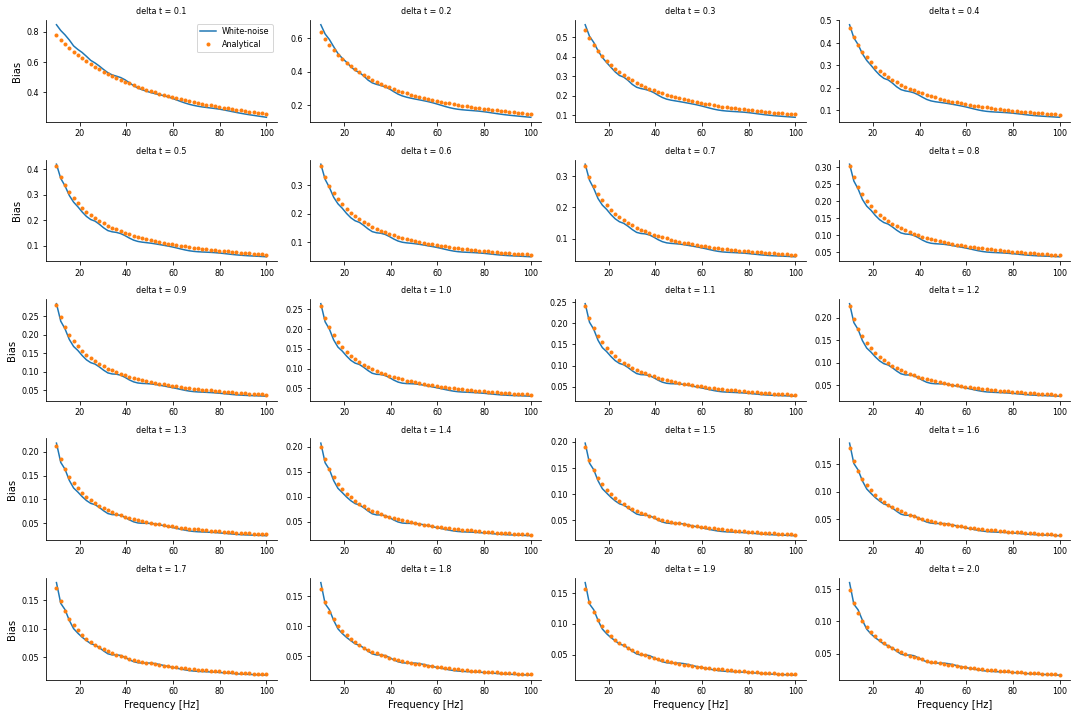

In [8]:
plt.figure(figsize=(15, 10))
for i in range(len(w_t)):
    ax = plt.subplot(5, 4, i + 1)
    plt.title(f"delta t = {np.round(w_t[i],2)}")
    plt.plot(freqs, B[i], "-")
    # plt.plot(freqs, [B_t[i]]*len(freqs), ".")
    plt.plot(freqs, B_t[i], ".")
    if i == 0:
        plt.legend(["White-noise", "Analytical"])
    if i > 15:
        plt.xlabel("Frequency [Hz]")
    if i % 4 == 0:
        plt.ylabel("Bias")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("img/n3.1.0/cte_delta_nco.png", dpi=300)

#### Constant $\delta$, and $n_{co}$ proportional to frequency

In [9]:
delta = 1
freqs = np.linspace(10, 100, 50)
w_t = np.linspace(0.1, 2.0, 20)

n_cycles = freqs / 2.0

kw = dict(
    freqs=freqs,
    times="times",
    roi="roi",
    foi=None,
    n_jobs=20,
    pairs=None,
    sfreq=1000,
    mode="morlet",
    n_cycles=n_cycles,
    decim=delta,
    metric="coh",
    sm_kernel="square",
    sm_freqs=1,
    block_size=1,
)

coh_eta = []
for i in range(len(w_t)):
    kw["sm_times"] = w_t[i]
    coh_eta += [conn_spec(eta, **kw)]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=100, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=200, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    2.7s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=300, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.3s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=400, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.3s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=500, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.5s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=600, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.2s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=700, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.2s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=800, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.2s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=900, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    2.9s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1000, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.0s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1100, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.2s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.6s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1200, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1300, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.4s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.5s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1400, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.4s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.5s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1500, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.4s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.6s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.0s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1600, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    3.9s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1700, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.2s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1800, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.8s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.8s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.1s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=1900, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    3.8s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    3.9s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.4s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

Defining links (n_roi=30; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Computing pairwise Coherence (n_pairs=435, n_freqs=50, decim=1, sm_times=2000, sm_freqs=1)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  18 out of  30 | elapsed:    4.0s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  25 out of  30 | elapsed:    4.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.5s finished


  0%|          | Estimating pairwise Coherence for trials 0...0 : 0/435 [00:00<?,       ?it/s]

In [10]:
B = []
B_t = []

for i in range(len(w_t)):
    B += [coh_eta[i].isel(times=slice(20, -20)).squeeze().mean(dim=("roi", "times"))]
    # B_t += [(1 + 2*n_cy[i]/n_cycles)**-1 ]
    B_t += [_bias_lachaux(w_t[i], freqs, n_cycles)]

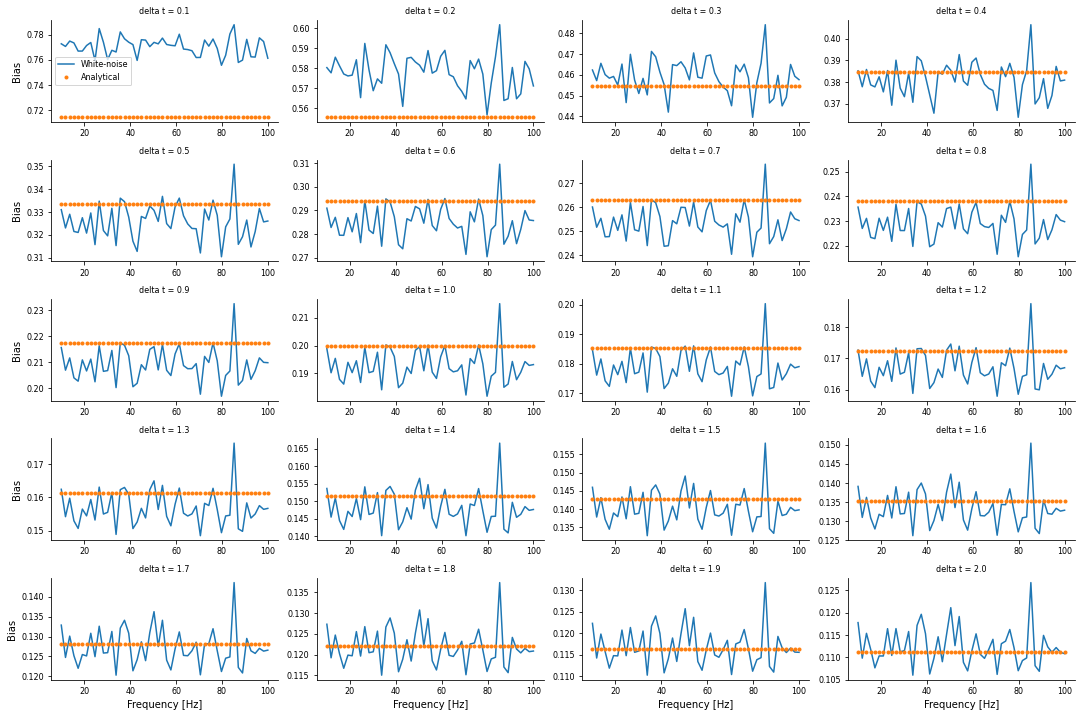

In [11]:
plt.figure(figsize=(15, 10))
for i in range(len(w_t)):
    ax = plt.subplot(5, 4, i + 1)
    plt.title(f"delta t = {np.round(w_t[i],2)}")
    plt.plot(freqs, B[i], "-")
    # plt.plot(freqs, [B_t[i]]*len(freqs), ".")
    plt.plot(freqs, B_t[i], ".")
    if i == 0:
        plt.legend(["White-noise", "Analytical"])
    if i > 15:
        plt.xlabel("Frequency [Hz]")
    if i % 4 == 0:
        plt.ylabel("Bias")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("img/n3.1.0/cte_delta_var_nco.png", dpi=300)

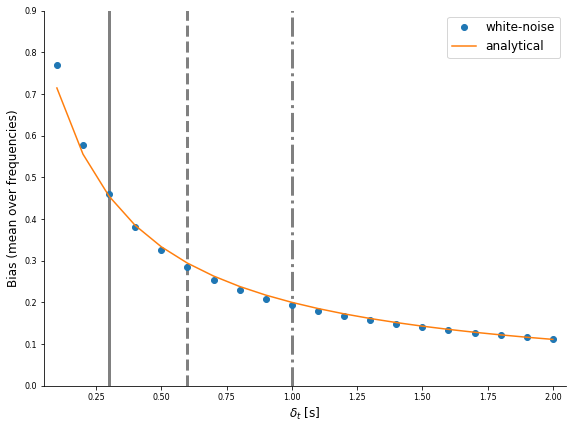

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
B_total = np.mean(B, -1)
B_t_total = np.mean(B_t, -1)
plt.plot(w_t, B_total, "o", label="white-noise")
plt.plot(w_t, B_t_total, "-", label="analytical")
plt.legend(fontsize=BIGGER_SIZE)
plt.vlines(0.3, 0, 9, "gray", lw=3)
plt.vlines(0.6, 0, 9, "gray", ls="--", lw=3)
plt.vlines(1.0, 0, 9, "gray", ls="-.", lw=3)
plt.ylim(0, 0.9)
plt.xlim(0.05, 2.05)
plt.ylabel("Bias (mean over frequencies)", fontsize=BIGGER_SIZE)
plt.xlabel(r"$\delta_t$ [s]", fontsize=BIGGER_SIZE)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("img/n3.1.0/cte_delta_nco_avg.png", dpi=300)